In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!kaggle competitions download -c competitive-data-science-predict-future-sales

In [89]:
sales_df = pd.read_csv('sales_train.csv')
items_df = pd.read_csv('items.csv')
iCats_df = pd.read_csv('item_categories.csv')
shops_df = pd.read_csv('shops.csv')

In [91]:
sales_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [173]:
sales_df.isnull().any().sort_values()

date              False
date_block_num    False
shop_id           False
item_id           False
item_price        False
item_cnt_day      False
d                 False
m                 False
y                 False
mtyr              False
dtype: bool

It looks like the date is not in the correct format, let's split it

In [93]:
sales_df[['d','m','y']] = sales_df.date.str.split('.', expand=True)

In [94]:
sales_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,d,m,y
0,02.01.2013,0,59,22154,999.00,1.0,02,01,2013
1,03.01.2013,0,25,2552,899.00,1.0,03,01,2013
2,05.01.2013,0,25,2552,899.00,-1.0,05,01,2013
3,06.01.2013,0,25,2554,1709.05,1.0,06,01,2013
4,15.01.2013,0,25,2555,1099.00,1.0,15,01,2013


Let's check price distribution per unique Month

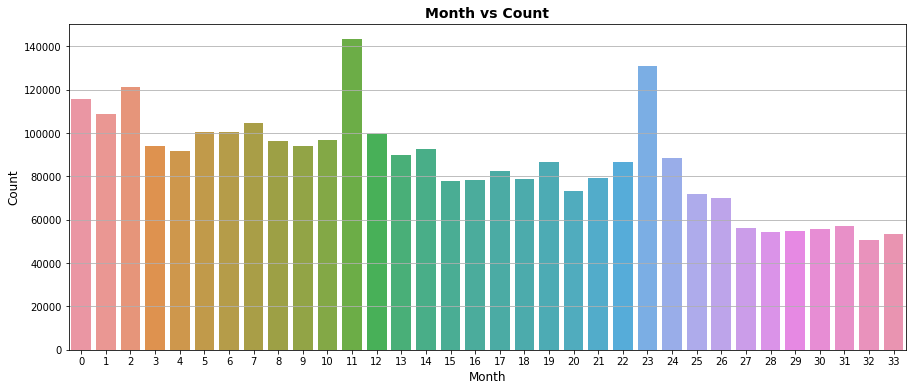

In [163]:
fig, ax = plt.subplots(figsize=(15,6))
df = sales_df.groupby(['date_block_num'])['item_cnt_day'].agg('sum').reset_index()
# df = pd.DataFrame({'d':s.index, 'count':s.values})

sns.countplot(x='date_block_num', data=sales_df)

# plt.xticks(fontsize=15)
ax.set_xlabel('Month', fontsize = 12)
# plt.yticks(fontsize=15)
ax.set_ylabel('Count', fontsize = 12)
# ax.set(ylim=(85000,105000))

ax.set_title('Month vs Count', fontweight="bold", size=14)
ax.yaxis.grid(True)
plt.show()

In [161]:
sales_df['mtyr'] = sales_df['m'] +'-'+ sales_df['y']
sales_df[sales_df.date_block_num.isin(df.sort_values('item_cnt_day',ascending=False)[:10]['date_block_num'].reset_index().date_block_num)]['mtyr'].value_counts()

12-2013    143246
12-2014    130786
03-2013    121347
01-2013    115690
02-2013    108613
08-2013    104772
06-2013    100403
11-2013     96736
09-2013     96137
10-2013     94202
Name: mtyr, dtype: int64

It looks like Dec 2013 and Dec 2014 had the highest sales. Followed by Mar, Jan  and Feb 2013. Sales have decreased quite a bit over time with some peaks.

In [168]:
sales_df.groupby('item_id')['item_price'].agg('unique')

item_id
0                                                   [58.0]
1                                                 [4490.0]
2                                                   [58.0]
3                                            [100.0, 58.0]
4                                                   [58.0]
                               ...                        
22165                                               [59.0]
22166                                              [150.0]
22167    [299.0, 287.0, 155.0, 239.2, 284.0, 268.9, 269...
22168                                       [799.0, 798.5]
22169                                             [4349.0]
Name: item_price, Length: 21807, dtype: object

It looks like prices are not constant

In [174]:
sales_df['effectivePrice'] = sales_df.item_cnt_day*sales_df.item_price
sales_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,d,m,y,mtyr,effectivePrice
0,02.01.2013,0,59,22154,999.00,1.0,02,01,2013,01-2013,999.00
1,03.01.2013,0,25,2552,899.00,1.0,03,01,2013,01-2013,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,05,01,2013,01-2013,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,06,01,2013,01-2013,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,15,01,2013,01-2013,1099.00


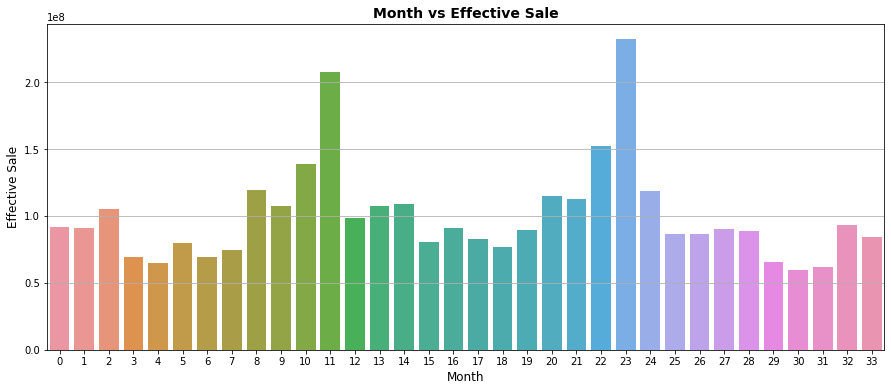

In [180]:
fig, ax = plt.subplots(figsize=(15,6))
df = sales_df.groupby(['date_block_num'])['effectivePrice'].agg('sum').reset_index()
# df = pd.DataFrame({'d':s.index, 'count':s.values})

sns.barplot(x='date_block_num',y='effectivePrice', data=df)

# plt.xticks(fontsize=15)
ax.set_xlabel('Month', fontsize = 12)
# plt.yticks(fontsize=15)
ax.set_ylabel('Effective Sale', fontsize = 12)
# ax.set(ylim=(85000,105000))

ax.set_title('Month vs Effective Sale', fontweight="bold", size=14)
ax.yaxis.grid(True)
plt.show()

Total Sale amount follows almost same pattern as that of amount of sales in case of top sales. But the amount between 5e7 and 1e8 is almost similar between first few months and last few months despite first few sales were more.